# Carte des trajectoires d'avions

#### Dépendances

In [11]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
from modestk.flight import FlightCollection
from modestk.projection import sph2lcc

#### Fond de carte

In [14]:
ROUTE_BASE_DIR = "/home/human/ilems/mt11-python-cartographie/projet/map/data/"
ROUTE_SHP_DIR = "ROUTE500_3-0__SHP_LAMB93_FXX_2021-11-03/ROUTE500/1_DONNEES_LIVRAISON_2022-01-00175/R500_3-0_SHP_LAMB93_FXX-ED211/"

features_path_dict = {"frontieres": "ADMINISTRATIF/LIMITE_ADMINISTRATIVE.shp",
                      "aerodromes": "RESEAU_ROUTIER/AERODROME.shp",
                      "fer": "RESEAU_FERRE/TRONCON_VOIE_FERREE.shp",
                      "eau": "HABILLAGE/TRONCON_HYDROGRAPHIQUE.shp"}

In [5]:
features_dict = {}
for key , path in features_path_dict.items():
    features_dict[key] = gpd.read_file(ROUTE_BASE_DIR + ROUTE_SHP_DIR + path)

#### Position des stations au sol

In [13]:
gps_dict = {"1": (2.343489415284081,48.85313179527069),
            "2": (2.218672000042794,48.71190699988616),
            "3": (2.171222222222222,48.70938888888889),
            "4": (2.367996649928126,48.72772029632976),
            "5": (2.196247797054214,48.78066589494499),
            "6": (2.112332288629579,48.75029205117610)}

#### Chargement des données enregistrées

In [6]:
data_adsb = pd.read_pickle("data/data_full.pkl").query("30 < latitude < 60 and -10 < longitude < 10 and receiver == 1").sort_values(by="timestamp")

#### Création d'une FlightCollection

In [21]:
fc = FlightCollection(data_adsb)
fc.summary()

,icao24,callsign,start,stop
0,0200ea,RAM640B,2022-10-13 13:10:43.386141+00:00,2022-10-13 13:20:20.785407+00:00
1,020113,RAM643J,2022-10-13 12:38:33.781579+00:00,2022-10-13 12:42:42.098402+00:00
2,020136,FRV0906,2022-10-13 12:44:47.831591+00:00,2022-10-13 12:53:00.635701+00:00
3,0a0074,DAH1087,2022-10-13 13:03:31.446243+00:00,2022-10-13 13:04:36.361674+00:00
4,0a008c,DAH1011,2022-10-13 12:32:19.517874+00:00,2022-10-13 12:34:15.778447+00:00
...,...,...,...,...
318,ab120b,DAL185,2022-10-13 12:36:47.813306+00:00,2022-10-13 12:50:46.590898+00:00
319,ab236a,AAL755,2022-10-13 13:14:40.474733+00:00,2022-10-13 13:20:20.998870+00:00
320,abc1da,FDX5030,2022-10-13 12:40:51.923545+00:00,2022-10-13 13:04:03.413270+00:00
321,ac3f20,N8889,2022-10-13 12:41:03.392257+00:00,2022-10-13 13:03:42.079533+00:00


#### Affichage

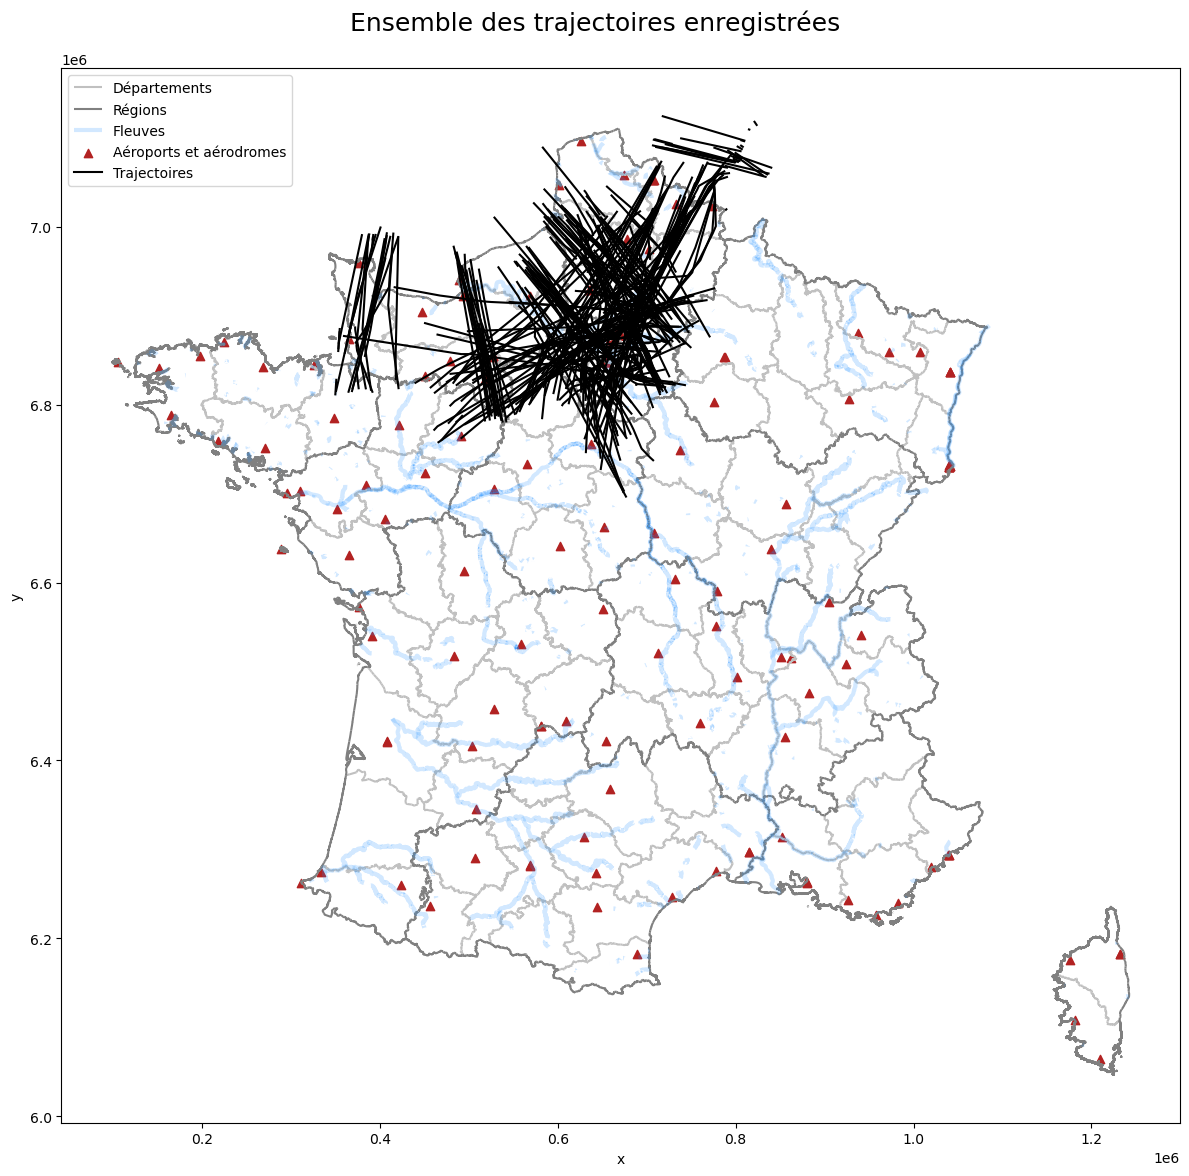

In [27]:
fig, ax = plt.subplots(figsize=(12, 12))

features_dict["frontieres"].query("NATURE  == 'Limite de département'").plot(ax=ax, color="silver", label='Départements')
features_dict["frontieres"].query("NATURE  == 'Limite de région'").plot(ax=ax, color="gray", label='Régions')
features_dict["frontieres"].query("NATURE  in ['Frontière internationale', 'Limite côtière']").plot(ax=ax, color="gray")
features_dict["eau"].query( "LARGEUR == 'Plus de 50 mètres'").plot(ax=ax, color="dodgerblue", linewidth=3, label='Fleuves', alpha=0.2)
features_dict['aerodromes'].query("TOPONYME != None").plot(ax=ax, color="firebrick", marker="^", linewidth=1, label='Aéroports et aérodromes')

for flight in fc:
    flight.plot_lcc(ax, color="black", label="Trajectoires")

ax.set_xlabel('x')
ax.set_ylabel('y')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc=2)

fig.suptitle("Ensemble des trajectoires enregistrées", fontsize=18)
fig.tight_layout()
fig.savefig("img/trajectoires_france.svg")

/home/human/anaconda3/envs/carto/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


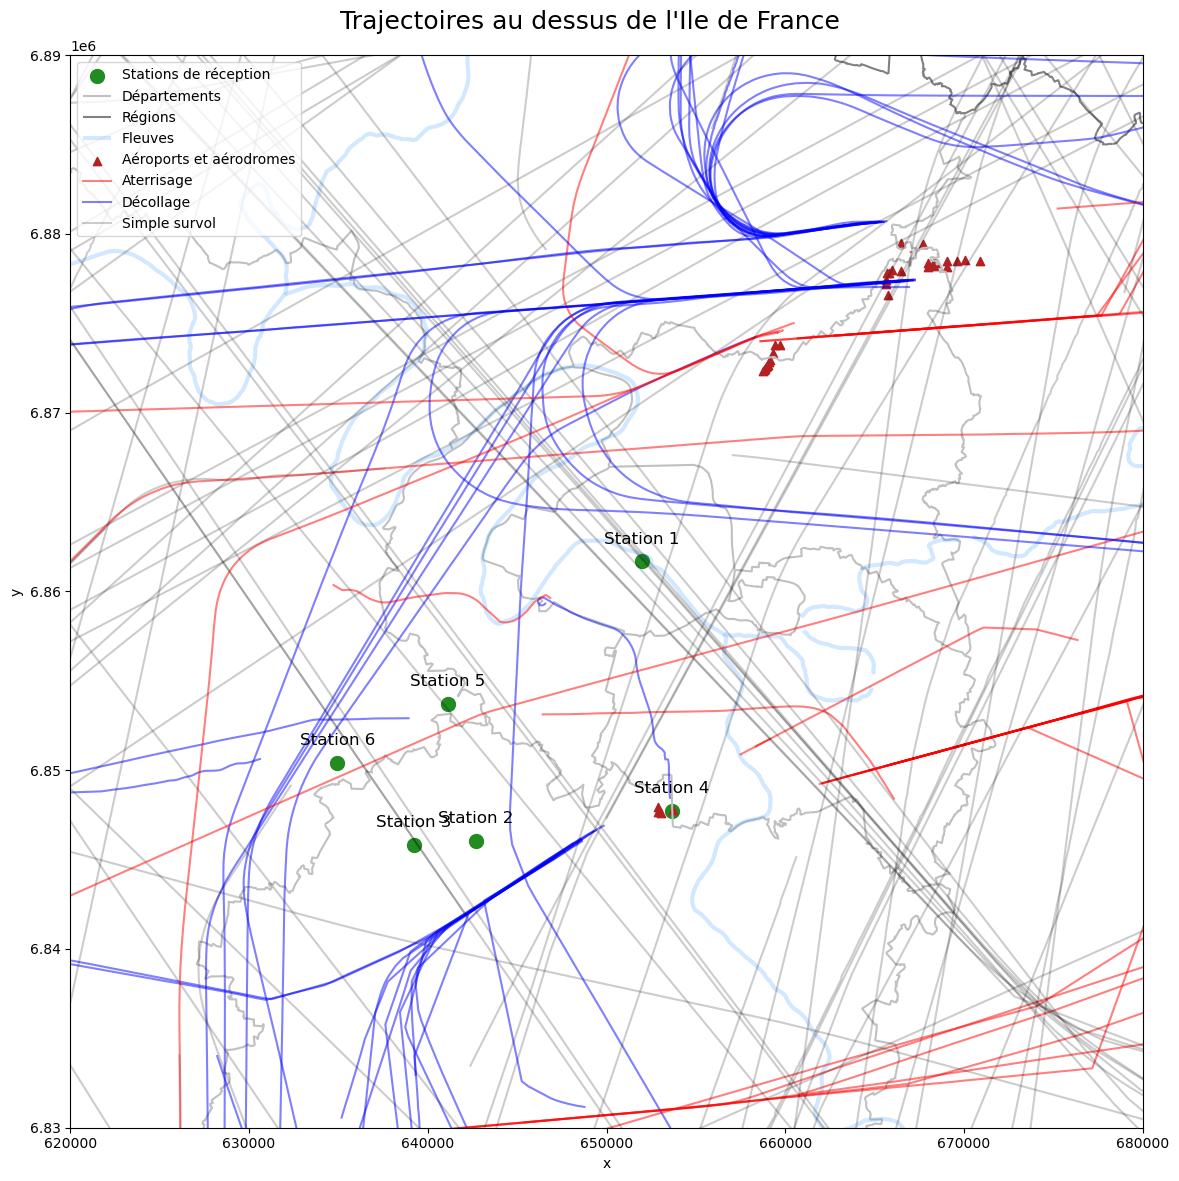

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))

for i, (id_recv, gps_pos) in enumerate(gps_dict.items()):
    x, y = sph2lcc(*gps_pos)
    ax.scatter(x, y, color="forestgreen", marker="o", s=100, alpha=1, label='Stations de réception')
    ax.text(x, y+1000, s="Station {}".format(id_recv), fontsize=12, horizontalalignment='center')

features_dict["frontieres"].query("NATURE  == 'Limite de département'").plot(ax=ax, color="silver", label='Départements')
features_dict["frontieres"].query("NATURE  == 'Limite de région'").plot(ax=ax, color="gray", label='Régions')
features_dict["frontieres"].query("NATURE  in ['Frontière internationale', 'Limite côtière']").plot(ax=ax, color="gray")
features_dict["eau"].query( "LARGEUR == 'Plus de 50 mètres'").plot(ax=ax, color="dodgerblue", linewidth=3, label='Fleuves', alpha=0.2)
features_dict['aerodromes'].query("TOPONYME != None").plot(ax=ax, color="firebrick", marker="^", linewidth=1, label='Aéroports et aérodromes')

for flight in fc:
    if (flight.data["altitude"] > 6000).all():
        # L'avion ne semble ni décoller, ni atterir
        (color, label, alpha) = ("black", "Simple survol", 0.2)
    else:
        # L'avion semble décoller ou atterir, on lève l'ambiguité en regardant la pente d'un polynome d'ordre 1
        trend = np.polyfit(flight.data.timestamp.astype(int), flight.data.altitude, deg=1)[-2]
        (color, label, alpha) = ("Blue", "Décollage", 0.5) if trend > 0 else ("Red", "Aterrisage", 0.5)

    flight.plot_lcc(
        ax,
        color=color,
        alpha=alpha,
        label=label
    )

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim((0.62e6, 0.68e6))
ax.set_ylim((6.83e6, 6.89e6))


handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc=2)

fig.suptitle("Trajectoires au dessus de l'Ile de France", fontsize=18)
fig.tight_layout()
fig.savefig("img/trajectoires_paris.svg")